# Imports

In [204]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\malac\Documents\Instacart Basket Analysis CF"

In [3]:
path

'C:\\Users\\malac\\Documents\\Instacart Basket Analysis CF'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_2.pkl'))
#ords_prior and df_prods merge import

# 4.10 Reading

In [5]:
#Create a crosstab for Excel

crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)

In [6]:
#Copy crosstab and paste in Excel 

crosstab.to_clipboard()

# 4.10 Answers Part 1

## 2.

In [7]:
#Check column names

ords_prods_merge.dtypes

Unnamed: 0_x                 int64
order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
Unnamed: 0_y                 int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
exist                     category
price_range_loc             object
busiest_day                 object
Busiest_days                object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spending_flag               object
frequency                  float64
frequency_flag              object
first_name          

## Data Security:
Some of the columns that contain PII are last_name, age, number_of_dependants, and fam_status

## 3.

In [8]:
#Frequency check on state column

ords_prods_merge['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
#Create new region column result using Wikipedia info
result =[]
for state in ords_prods_merge['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Kansas') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri'):
        result.append('Midwest')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        result.append('South')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        result.append('Northeast')
    else:
        result.append('West')

In [10]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [11]:
#Create new region column in ords_prods_merge

ords_prods_merge['region'] = result

In [12]:
#Check freq of new column

ords_prods_merge['region'].value_counts(dropna = False)

South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
#Compare length of state to region for confirmation

len(ords_prods_merge['state'])

32404859

In [14]:
len(ords_prods_merge['region'])

32404859

In [15]:
#Check dtype of region

ords_prods_merge[['region']].dtypes

region    object
dtype: object

In [16]:
#Change dtpe to category

ords_prods_merge['region'] = ords_prods_merge['region'].astype('category')

In [17]:
ords_prods_merge[['region']].dtypes

region    category
dtype: object

In [18]:
#Create a crosstab with spending

crosstab_regionspending = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False)

In [19]:
#result

crosstab_regionspending

spending_flag,High spender,Low spender
region,,
Midwest,7441350,155972
Northeast,5614511,108225
South,9961770,193091
West,8752983,176954


In [20]:
crosstab_regionspending.to_clipboard()

## Calculate Percentage of high spenders for each region

In [21]:
7441350 + 155972

7597322

In [22]:
Midwest_highspenders = (155932/7597322)*100

In [23]:
Midwest_highspenders

2.052460064217365

In [24]:
108180 + 5614556

5722736

In [25]:
Northeast_highspenders = (108180/5722736)*100

In [26]:
Northeast_highspenders

1.8903545437007754

In [27]:
192887 + 9961974

10154861

In [28]:
South_highspenders = (192887/10154861)*100

In [29]:
South_highspenders

1.8994548522131423

In [30]:
176865 + 8753072

8929937

In [31]:
West_highspenders = (176865/8929937)*100

In [32]:
West_highspenders

1.980585081395311

## The Midwest region has the highest percentage of high spenders.

## 4.

In [33]:
#Create flag for low activity customers

ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'excursion_flag'] = 'low activity customer'

In [34]:
#Create flag for non low activity customer

ords_prods_merge.loc[ords_prods_merge['max_order'] >= 5, 'excursion_flag'] = 'non low activity customer'

In [35]:
#Freq check on new flag

ords_prods_merge['excursion_flag'].value_counts(dropna = False)

non low activity customer    30964564
low activity customer         1440295
Name: excursion_flag, dtype: int64

In [36]:
ords_prods_merge['excursion_flag'].head()

0    non low activity customer
1    non low activity customer
2    non low activity customer
3    non low activity customer
4    non low activity customer
Name: excursion_flag, dtype: object

In [37]:
#Create low activity subset

ords_prods_merge_low_activity = ords_prods_merge[ords_prods_merge['excursion_flag'] =='low activity customer']

In [38]:
ords_prods_merge_low_activity.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,excursion_flag
1510,1744,520620,120,prior,1,3,11,NaN,196,2,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1511,1746,3273029,120,prior,3,2,8,19.0,196,2,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1512,1744,520620,120,prior,1,3,11,NaN,46149,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1513,1746,3273029,120,prior,3,2,8,19.0,46149,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer
1514,1744,520620,120,prior,1,3,11,NaN,26348,3,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity customer


In [39]:
ords_prods_merge_low_activity.shape

(1440295, 39)

In [40]:
ords_prods_merge_low_activity['max_order'].value_counts(dropna = False)

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [41]:
#Create crosstab with region and ex flag

crosstab_region_excursion = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['excursion_flag'], dropna = False)

In [42]:
crosstab_region_excursion.to_clipboard()

In [43]:
#Export subset for low activity customers
ords_prods_merge_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merge_low_activity_customers.pickle'))

## 5.

In [44]:
ords_prods_merge['excursion_flag'] = ords_prods_merge['excursion_flag'].astype('category')

In [45]:
ords_prods_merge.shape

(32404859, 39)

In [46]:
ords_prods_merge.dtypes

Unnamed: 0_x                 int64
order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
Unnamed: 0_y                 int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
exist                     category
price_range_loc             object
busiest_day                 object
Busiest_days                object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spending_flag               object
frequency                  float64
frequency_flag              object
first_name          

## Create new profiles using age, income, certain goods in dep_id column, and number of dependants



## Age Profiles:

In [47]:
ords_prods_merge['age'].min()

18

In [48]:
ords_prods_merge['age'].max()

81

In [49]:
#Creating profiles

ords_prods_merge.loc[ords_prods_merge['age'] <24, 'Age_classification'] = '<24'

In [50]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=25) & (ords_prods_merge['age'] <=34), 'Age_classification'] = '25-34'

In [51]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=35) & (ords_prods_merge['age'] <=44), 'Age_classification'] = '35-44'

In [52]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=45) & (ords_prods_merge['age'] <=54), 'Age_classification'] = '45-54'

In [53]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=55) & (ords_prods_merge['age'] <=64), 'Age_classification'] = '55-64'

In [54]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=65) & (ords_prods_merge['age'] <=74), 'Age_classification'] = '65-74'

In [55]:
ords_prods_merge.loc[(ords_prods_merge['age'] >=75) & (ords_prods_merge['age'] <=81), 'Age_classification'] = '74-81'

In [56]:
#Check profiles

ords_prods_merge['Age_classification'].value_counts().sort_index()

25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
74-81    3570083
<24      3063939
Name: Age_classification, dtype: int64

In [57]:
#Create crosstab for age and fam_status

crosstab_age_family = pd.crosstab(ords_prods_merge['Age_classification'], ords_prods_merge['fam_status'], dropna = False)

In [58]:
crosstab_age_family

fam_status,divorced/widowed,living with parents and siblings,married,single
Age_classification,,,,
25-34,0,0,3761305,1293349
35-44,0,0,3804905,1257524
45-54,0,0,3856661,1254465
55-64,651728,0,3720062,656775
65-74,1232677,0,3772324,0
74-81,887407,0,2682676,0
<24,0,1550603,767154,746182


In [59]:
#Create crosstab for age and loyalty flag

crosstab_age_loyalty = pd.crosstab(ords_prods_merge['Age_classification'], ords_prods_merge['loyalty_flag'], dropna = False)

In [60]:
crosstab_age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
Age_classification,,,
25-34,1571822,982116,2500716
35-44,1613222,964481,2484726
45-54,1625107,975997,2510022
55-64,1606402,980313,2441850
65-74,1588653,971200,2445148
74-81,1135305,684999,1749779
<24,990777,584623,1488539


In [61]:
crosstab_age_loyalty.to_clipboard()

In [62]:
#Create crosstab for age and nuber of dependants 

crosstab_age_dependants = pd.crosstab(ords_prods_merge['Age_classification'], ords_prods_merge['number_of_dependants'], dropna = False)

In [63]:
crosstab_age_dependants

number_of_dependants,0,1,2,3
Age_classification,,,,
25-34,1293349,1221502,1279883,1259920
35-44,1257524,1292455,1258621,1253829
45-54,1254465,1289295,1260718,1306648
55-64,1308503,1231949,1227054,1261059
65-74,1232677,1221032,1278173,1273119
74-81,887407,902691,908841,871144
<24,746182,783823,753963,779971


In [64]:
crosstab_age_dependants.to_clipboard()

## Income Profiles:

In [65]:
ords_prods_merge['income'].min()

25903

In [66]:
ords_prods_merge['income'].max()

593901

In [67]:
ords_prods_merge['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 108012, dtype: int64

In [68]:
#Create catergories for income using for loops 
income = []

for value in ords_prods_merge['income']:
    if value <=25000:
        income.append('0-025000')
    elif (value > 25000) and (value <= 40000):
        income.append('025000-040000')
    elif (value > 40000) and (value <= 99000):
        income.append('040000-099000')
    elif (value > 99000) and (value <=199000):
            income.append('099000-199000')
    elif (value > 199000) and (value <= 299000):
            income.append('199000-299000')
    elif (value > 299000) and (value <= 399000):
            income.append('299000-399000')
    elif (value > 399000) and (value <= 499000):
            income.append('399000-499000')
    elif (value > 4999000) and (value <= 523000):
            income.append('499000-523000')
    elif (value > 523000):
            income.append('523000+')
    else: 
            income.append('other')
            
    

In [69]:
#Set results to income_range in df

ords_prods_merge['income_range'] = income

In [70]:
ords_prods_merge['income_range'].value_counts().sort_index()

025000-040000     1727198
040000-099000    15441227
099000-199000    14977601
199000-299000      155306
299000-399000       55835
399000-499000       28337
523000+             14611
other                4744
Name: income_range, dtype: int64

In [71]:
#Create crosstab for age and income_range

crosstab_age_income = pd.crosstab(ords_prods_merge['Age_classification'], ords_prods_merge['income_range'], dropna = False)

In [72]:
crosstab_age_income

income_range,025000-040000,040000-099000,099000-199000,199000-299000,299000-399000,399000-499000,523000+,other
Age_classification,,,,,,,,
25-34,371785,4445903,217431,6985,12550,0,0,0
35-44,295357,3183867,1550367,21167,6279,3801,1232,359
45-54,219762,1272702,3559999,36541,8374,8088,3421,2239
55-64,215517,1259344,3500878,29816,13636,4426,3975,973
65-74,213815,1234743,3514626,28180,5395,6636,1444,162
74-81,156145,891539,2481428,27106,2929,5386,4539,1011
<24,224933,2704972,124399,3327,6308,0,0,0


## Department ID Profiles:

In [73]:
# Import the department data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [74]:
df_dept.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [75]:
#Transpose df_dept

df_dept.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [76]:
#Create new colunm called department name by pairing the department id
ords_prods_merge.loc[ords_prods_merge['department_id'] == 1, 'department_name'] = 'frozen'

In [77]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 2,'department_name'] = 'other'

In [78]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 3,'department_name'] = 'bakery'

In [79]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 4 , 'department_name'] = 'produce'

In [80]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 5, 'department_name'] = 'alcohol'

In [81]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 6, 'department_name'] = 'international'

In [82]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 7, 'department_name'] = 'beverages'

In [83]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 8, 'department_name'] = 'pets'

In [84]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 9, 'department_name'] = 'dry goods pasta'

In [85]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 10, 'department_name'] = 'bulk'

In [86]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 11, 'department_name'] = 'personal care'

In [87]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 12, 'department_name'] = 'meat seafood'

In [88]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 13, 'department_name'] = 'pantry'

In [89]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 14, 'department_name'] = 'breakfast'

In [90]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 15, 'department_name'] = 'canned goods'

In [91]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 16, 'department_name'] = 'dairy eggs'

In [92]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 17, 'department_name']= 'household'

In [93]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 18, 'department_name'] = 'babies'

In [94]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 19, 'department_name'] = 'snacks'

In [95]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 20, 'department_name'] = 'deli'

In [96]:
ords_prods_merge.loc[ords_prods_merge['department_id'] == 21, 'department_name'] = 'missing'

In [97]:
ords_prods_merge['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [98]:
ords_prods_merge['department_id'].value_counts(dropna = False).sort_index()

1     2234743
2       36291
3     1172428
4     9479291
5      153696
6      269253
7     2688123
8       97716
9      866627
10      34573
11     447572
12     708927
13    1875369
14     703033
15    1068058
16    5398747
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: department_id, dtype: int64

In [150]:
ords_prods_merge[['department_id', 'department_name']].value_counts()

department_id  department_name
4              produce            9479291
16             dairy eggs         5398747
19             snacks             2887550
7              beverages          2688123
1              frozen             2234743
13             pantry             1875369
3              bakery             1172428
15             canned goods       1068058
20             deli               1051249
9              dry goods pasta     866627
17             household           738666
12             meat seafood        708927
14             breakfast           703033
11             personal care       447572
18             babies              423802
6              international       269253
5              alcohol             153696
8              pets                 97716
21             missing              69145
2              other                36291
10             bulk                 34573
dtype: int64

In [151]:
#Creating new column for top 5 products
ords_prods_merge.loc[ords_prods_merge['department_id'] == 4, 'Top_5_department'] = 'produce'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 16, 'Top_5_department'] = 'dairy eggs'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 19, 'Top_5_department'] = 'snacks'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 7, 'Top_5_department'] = 'beverages'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 1, 'Top_5_department'] = 'frozen'

In [152]:
ords_prods_merge['Top_5_department'].value_counts().sort_index()

beverages     2688123
dairy eggs    5398747
frozen        2234743
produce       9479291
snacks        2887550
Name: Top_5_department, dtype: int64

In [246]:
ords_prods_merge['Top_5_department'] = ords_prods_merge['Top_5_department'].astype('category')

In [249]:
ords_prods_merge['Top_5_department'].dtypes

CategoricalDtype(categories=['beverages', 'dairy eggs', 'frozen', 'produce', 'snacks'], ordered=False)

## Number of Dependants Profiles:

In [99]:
#Check num_of_dependants freq

ords_prods_merge['number_of_dependants'].value_counts().sort_index()

0    8097503
1    8081104
2    8091143
3    8135109
Name: number_of_dependants, dtype: int64

In [101]:
#Create new column for parental status

ords_prods_merge.loc[ords_prods_merge['number_of_dependants'] <= 0, 'parental_status'] = 'non parent'

In [102]:
ords_prods_merge.loc[ords_prods_merge['number_of_dependants'] >= 1, 'parental_status'] = 'parent'

In [105]:
ords_prods_merge['parental_status'].value_counts().sort_index()

non parent     8097503
parent        24307356
Name: parental_status, dtype: int64

In [106]:
#Change new column data types to category

ords_prods_merge[['Age_classification', 'income_range', 'parental_status']] = ords_prods_merge[['Age_classification', 'income_range', 'parental_status']].astype('category')

In [107]:
ords_prods_merge[['Age_classification', 'income_range', 'parental_status']].dtypes

Age_classification    category
income_range          category
parental_status       category
dtype: object

In [143]:
crosstab_parent_price = pd.crosstab(ords_prods_merge['parental_status'], ords_prods_merge['price_range_loc'], dropna = False)

In [144]:
crosstab_parent_price

price_range_loc,High-range product,Low-range product,Mid-range product
parental_status,,,
non parent,102177,2531324,188954
parent,315501,7594997,567496


In [145]:
crosstab_parent_price.to_clipboard()

In [ ]:
crosstab_parent_flag = pd.crosstab(ords_prods_merge['parental_status'], ords_prods_merge['frequency_flag'], dropna = False)

In [149]:
crosstab_parent_flag

frequency_flag,Frequent customer,Non-frequent customer
parental_status,,
non parent,989773,7107730
parent,3018878,21288473


## Order Hour of Day Profiles:

In [110]:
ords_prods_merge['order_hour_of_day'].min()

0

In [111]:
ords_prods_merge['order_hour_of_day'].max()

23

In [113]:
ords_prods_merge['order_hour_of_day'].value_counts().sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

In [122]:
#Create crosstab of order hour and income range

crosstab_hour_income = pd.crosstab(ords_prods_merge['order_hour_of_day'], ords_prods_merge['income_range'], dropna = False)

In [123]:
crosstab_hour_income

income_range,025000-040000,040000-099000,099000-199000,199000-299000,299000-399000,399000-499000,523000+,other
order_hour_of_day,,,,,,,,
0,11517,105340,100606,778,377,52,80,19
1,5498,56682,52624,385,338,55,118,0
2,3836,33523,31079,426,416,13,32,50
3,3038,24924,22797,190,257,36,11,28
4,2956,24679,24899,378,180,116,21,13
5,3908,42039,40899,624,287,107,20,77
6,14056,138841,134579,2165,373,359,97,23
7,41804,421925,419277,4356,1977,1192,437,86
8,90879,814047,799242,8193,3355,1461,730,211


In [124]:
crosstab_hour_income.to_clipboard()

## Order Day of the Week Profiles: 

In [128]:
#Check freq of variables

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

In [129]:
#Create new column with name of weekday

ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'Saturday'

In [130]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'Sunday'

In [132]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'Monday'

In [133]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'Tuesday'

In [134]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'Wednesday'

In [130]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'Thursday'

In [135]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'Friday'

In [136]:
ords_prods_merge['day_of_week'].value_counts().sort_index()

Friday       4496490
Monday       4213830
Saturday     6204182
Sunday       5660230
Tuesday      3840534
Wednesday    3783802
Name: day_of_week, dtype: int64

In [137]:
#Create crosstab with day of week and price loc

crosstab_day_price = pd.crosstab(ords_prods_merge['day_of_week'], ords_prods_merge['price_range_loc'], dropna = False)

In [138]:
crosstab_day_price

price_range_loc,High-range product,Low-range product,Mid-range product
day_of_week,,,
Friday,64000,1381463,95869
Monday,51340,1329813,100503
Saturday,87703,1897856,142186
Sunday,70046,1781899,141751
Tuesday,46489,1211356,90243
Wednesday,45773,1195353,88129


In [139]:
crosstab_day_price.to_clipboard()

In [166]:
ords_prods_merge[['customer_profile', 'user_id']].head()

,customer_profile,user_id
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [140]:
#Create crosstab for mean 

crosstab_mean_price = ords_prods_merge.groupby('day_of_week').agg({'prices': ['mean']})

In [141]:
crosstab_mean_price

,prices
,mean
day_of_week,
Friday,11.273960
Monday,12.356269
Saturday,11.166988
Sunday,12.181343
Tuesday,12.235072
Wednesday,12.169939


In [142]:
crosstab_mean_price.to_clipboard()

## Final Customer Profile

In [164]:
#Create flag for single adult (age: <25, income: 400000, department_id: 1, 4, 7, 8, 16, parental_status: Not Parent)
ords_prods_merge.loc[(ords_prods_merge['age'] <= 25) & (ords_prods_merge['income'] <= 400000) & (ords_prods_merge['department_id'].isin([1, 4, 7, 8, 16,])) & (ords_prods_merge['parental_status'] == 'non parent'), 'customer_profile'] = 'Single adult'

In [162]:
#Create flag for young parent (age: <25, income: 400000, department_id: 1, 4, 7, 8, 16, parental_status: Parent)
ords_prods_merge.loc[(ords_prods_merge['age'] <= 25) & (ords_prods_merge['income'] <= 400000) & (ords_prods_merge['department_id'].isin([1, 4, 7, 8, 16,])) & (ords_prods_merge['parental_status'] == 'parent'), 'customer_profile'] = 'Young parent'

In [169]:
#Transform values to be the same for each user id

ords_prods_merge['customer_profile'] = ords_prods_merge.groupby('user_id')['customer_profile'].transform('first')

In [165]:
ords_prods_merge['customer_profile'].value_counts()

Young parent    1865809
Single adult     613012
Name: customer_profile, dtype: int64

In [171]:
ords_prods_merge['customer_profile'].fillna('Others', inplace=True)

In [172]:
ords_prods_merge['customer_profile'].value_counts(dropna = False)

Others          28361249
Young parent     3046568
Single adult      997042
Name: customer_profile, dtype: int64

In [173]:
#Create crosstab with region and customer profile

crosstab_customer_region = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['region'], dropna = False)

In [174]:
crosstab_customer_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Others,6658248,5011966,8858513,7832522
Single adult,223266,179762,326934,267080
Young parent,715811,531008,969414,830335


In [175]:
crosstab_customer_region.to_clipboard()

In [178]:
#Create crosstab with customer profile and depart name

crosstab_customer_depart = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['department_name'], dropna = False)

In [179]:
crosstab_customer_depart

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Others,133638,370812,1026131,2355036,613558,30151,934594,4723887,920777,756840,...,647333,235237,620095,60147,31629,1641733,391873,84421,8301687,2526902
Single adult,4656,13312,36021,83859,21221,1086,32614,164990,32180,26833,...,21973,8588,21623,2228,1128,57693,13916,3206,293951,88958
Young parent,15402,39678,110276,249228,68254,3336,100850,509870,98292,82954,...,69360,25428,67209,6770,3534,175943,41783,10089,883653,271690


In [180]:
crosstab_customer_depart.to_clipboard()

In [181]:
#Create crosstab with customer profile and age profile

crosstab_customer_age = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['Age_classification'], dropna = False)

In [182]:
crosstab_customer_age

Age_classification,25-34,35-44,45-54,55-64,65-74,74-81,<24
customer_profile,,,,,,,
Others,4582728,5062429,5111126,5028565,5005001,3570083,1092
Single adult,133885,0,0,0,0,0,745876
Young parent,338041,0,0,0,0,0,2316971


In [183]:
crosstab_customer_age.to_clipboard()

In [184]:
#Create crosstan with customer profile and loyalty flag

crosstab_customer_loyalty = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['loyalty_flag'], dropna = False)

In [188]:
crosstab_customer_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
Others,9003746,5464621,13892882
Single adult,310321,199605,487116
Young parent,970026,579764,1496778


In [189]:
crosstab_customer_loyalty.to_clipboard()

In [185]:
#Create crosstab with customer profile and spending flag

crosstab_customer_spending = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['spending_flag'], dropna = False)

In [186]:
crosstab_customer_spending

spending_flag,High spender,Low spender
customer_profile,,
Others,27804856,556390
Single adult,978349,18693
Young parent,2987409,59159


In [187]:
crosstab_customer_spending.to_clipboard()

In [236]:
#Create crosstab with busiest period and age profile

crosstab_busiest_age = pd.crosstab(ords_prods_merge['Age_classification'], ords_prods_merge['Busiest_period_of_day'], dropna = False)

In [239]:
crosstab_busiest_age

Busiest_period_of_day,Average orders,Fewest orders,Most orders
Age_classification,,,
25-34,413928,4205956,434770
35-44,418952,4212097,431380
45-54,418960,4255069,437097
55-64,415151,4187999,425415
65-74,411114,4168465,425422
74-81,289779,2976831,303473
<24,251646,2551296,260997


In [231]:
crosstab_busiest_age.to_clipboard()

## 6. Visualizations of Profiles

In [190]:
ords_prods_merge.dtypes

Unnamed: 0_x                 int64
order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
Unnamed: 0_y                 int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
exist                     category
price_range_loc             object
busiest_day                 object
Busiest_days                object
Busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spending_flag               object
frequency                  float64
frequency_flag              object
first_name          

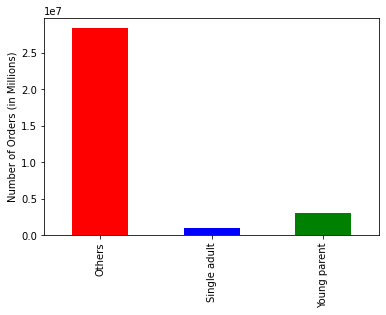

In [209]:
#Bar chart of number of orders by customer profile

customer_single_adult = ords_prods_merge['customer_profile'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green'], ylabel = 'Number of Orders (in Millions)')

In [212]:
customer_single_adult.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_signle_adult.png'))

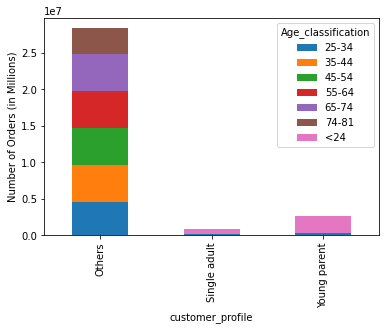

In [216]:
#Bar chart of number of orders by customer age 

customer_age = crosstab_customer_age.plot.bar(stacked = True, ylabel = 'Number of Orders (in Millions)')

In [217]:
customer_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_age.png'))

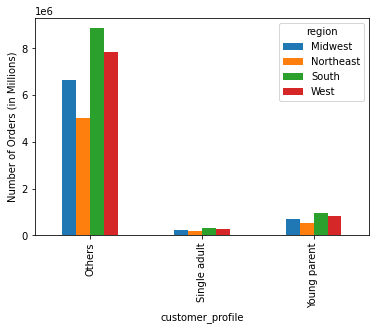

In [220]:
#Create bar chart of customer profile and region

customer_region = crosstab_customer_region.plot.bar(ylabel = 'Number of Orders (in Millions)')

In [221]:
customer_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_region.png'))

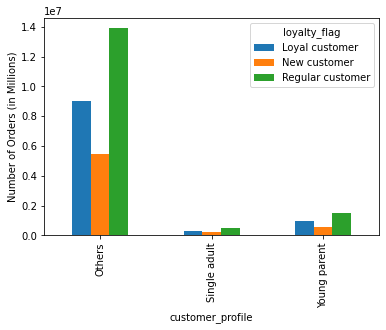

In [223]:
#Bar chart of customer profile and loyalty

customer_loyalty = crosstab_customer_loyalty.plot.bar(ylabel = 'Number of Orders (in Millions)')

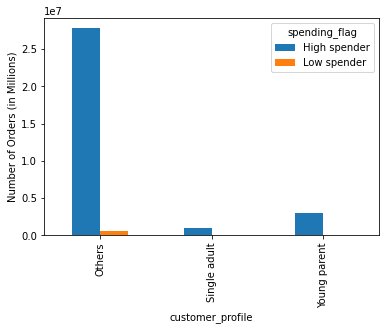

In [224]:
#Bar chart of customer profile and spending 

customer_spending = crosstab_customer_spending.plot.bar(ylabel = 'Number of Orders (in Millions)')

In [225]:
customer_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_spending.png'))

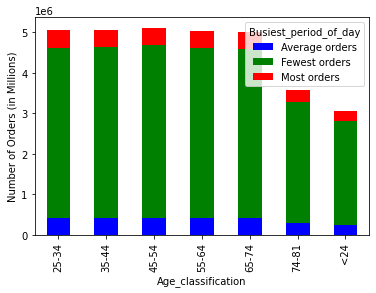

In [243]:
#Bar chart of busiest period of day and age profile

customer_orders = crosstab_busiest_age.plot.bar(stacked = True, color = ['blue', 'green', 'red'], ylabel = 'Number of Orders (in Millions)')

In [244]:
customer_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_busiest.png'))

## 7.

In [253]:
department_aggs = ords_prods_merge.groupby('department_name').agg({'prices': ['mean', 'min', 'max']})

In [254]:
department_aggs

prices              
                      mean  min      max
department_name                         
alcohol           8.143701  1.0     15.0
babies            7.638380  1.0     15.0
bakery            7.853809  1.0     15.0
beverages         7.680502  1.0     15.0
breakfast         8.028963  1.0     14.9
bulk              8.348960  1.4     14.1
canned goods      7.539976  1.0     15.0
dairy eggs       33.479533  1.0  99999.0
deli              7.778701  1.0     15.0
dry goods pasta   7.350283  1.0     15.0
frozen            7.736553  1.0     15.0
household         7.384058  1.0     15.0
international     7.682264  1.0     15.0
meat seafood     16.294443  8.0     25.0
missing           8.660716  1.0     15.0
other             6.990934  1.1     15.0
pantry            8.009443  1.0     20.0
personal care     7.996769  1.0     15.0
pets              7.889070  1.0     15.0
produce           7.981708  1.0     15.0
snacks            4.275437  1.6      7.0

In [256]:
age_price_agg = ords_prods_merge.groupby('Age_classification').agg({'prices': ['mean', 'min', 'max']})

In [258]:
age_price_agg

prices              
                         mean  min      max
Age_classification                         
25-34               12.000675  1.0  99999.0
35-44               11.556641  1.0  99999.0
45-54               12.063306  1.0  99999.0
55-64               12.350254  1.0  99999.0
65-74               11.438702  1.0  99999.0
74-81               12.231694  1.0  99999.0
<24                 12.225207  1.0  99999.0

In [259]:
income_range_agg = ords_prods_merge.groupby('income_range').agg({'prices': ['mean', 'max', 'min']})

In [260]:
income_range_agg

prices              
                     mean      max  min
income_range                           
025000-040000    6.495264     25.0  1.0
040000-099000    8.277665  99999.0  1.0
099000-199000   12.058429  99999.0  1.0
199000-299000  260.982235  99999.0  1.0
299000-399000  307.868690  99999.0  1.0
399000-499000  262.410869  99999.0  1.0
523000+        145.091151  99999.0  1.0
other          273.492833  99999.0  1.0

In [261]:
parent_agg = ords_prods_merge.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [262]:
parent_agg

prices              
                      mean  min      max
parental_status                         
non parent       12.129243  1.0  99999.0
parent           11.930584  1.0  99999.0

In [263]:
customer_profile_agg = ords_prods_merge.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [264]:
customer_profile_agg

prices              
                       mean  min      max
customer_profile                         
Others            11.952173  1.0  99999.0
Single adult      13.114809  1.0  99999.0
Young parent      11.870059  1.0  99999.0

In [265]:
customer_days_agg = ords_prods_merge.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [266]:
customer_days_agg

days_since_prior_order           
                                   mean  min   max
customer_profile                                  
Others                        11.106026  0.0  30.0
Single adult                  11.239507  0.0  30.0
Young parent                  11.041700  0.0  30.0

In [268]:
customer_max_agg = ords_prods_merge.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

In [269]:
customer_max_agg

max_order        
                       mean min max
customer_profile                   
Others            33.036263   1  99
Single adult      32.721565   3  99
Young parent      33.308415   3  99

## 8. and 9.

In [270]:
#Create crosstab with customer profile and region

crosstab_cust_pro_region = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['region'], dropna = False)

In [271]:
crosstab_cust_pro_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Others,6658248,5011966,8858513,7832522
Single adult,223266,179762,326934,267080
Young parent,715811,531008,969414,830335


In [272]:
crosstab_cust_pro_region.to_clipboard()

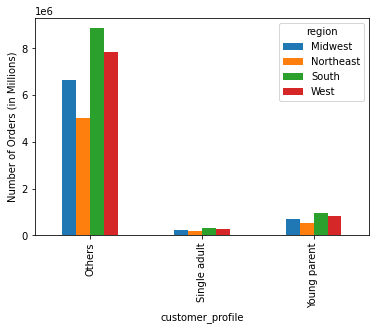

In [291]:
#Create bar chart

customer_pro_region = crosstab_cust_pro_region.plot.bar(ylabel = 'Number of Orders (in Millions)')

In [292]:
customer_pro_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_pro_region.png'))

In [273]:
#Create crosstab with customer profile and top 5

crosstab_customer_top5 = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['Top_5_department'], dropna = False)

In [274]:
crosstab_customer_top5

Top_5_department,beverages,dairy eggs,frozen,produce,snacks
customer_profile,,,,,
Others,2355036,4723887,1954768,8301687,2526902
Single adult,83859,164990,67006,293951,88958
Young parent,249228,509870,212969,883653,271690


In [275]:
crosstab_customer_top5.to_clipboard()

In [276]:
#Create crosstab with customer profile and top 5

crosstab_top5_customer = pd.crosstab(ords_prods_merge['Top_5_department'], ords_prods_merge['customer_profile'], dropna = False)

In [277]:
crosstab_top5_customer

customer_profile,Others,Single adult,Young parent
Top_5_department,,,
beverages,2355036,83859,249228
dairy eggs,4723887,164990,509870
frozen,1954768,67006,212969
produce,8301687,293951,883653
snacks,2526902,88958,271690


In [278]:
crosstab_top5_customer.to_clipboard()

In [284]:
#Create 100% crosstab for chart

crosstab_customer_dept = crosstab_top5_customer.div(crosstab_top5_customer.sum(axis=1), axis=0)*100

In [283]:
crosstab_customer_dept

customer_profile,Others,Single adult,Young parent
Top_5_department,,,
beverages,87.608938,3.119612,9.271451
dairy eggs,87.499692,3.056079,9.444228
frozen,87.471714,2.998376,9.529910
produce,87.577088,3.100981,9.321931
snacks,87.510242,3.080743,9.409015


In [285]:
crosstab_customer_dept.to_clipboard()

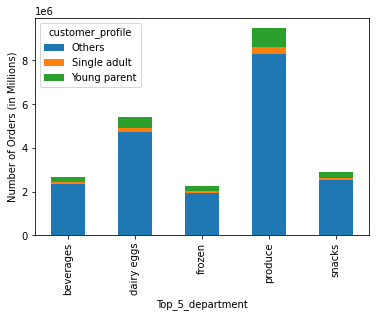

In [296]:
customer_top5 = crosstab_top5_customer.plot.bar(stacked = True, ylabel = 'Number of Orders (in Millions)')

In [297]:
customer_top5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_top5.png'))

In [286]:
#Create a cosstab for top 5 and parent profile

crosstab_top5_parent = pd.crosstab(ords_prods_merge['Top_5_department'], ords_prods_merge['parental_status'], dropna = False)

In [287]:
crosstab_top5_parent

parental_status,non parent,parent
Top_5_department,,
beverages,674442,2013681
dairy eggs,1349362,4049385
frozen,557160,1677583
produce,2375445,7103846
snacks,720798,2166752


In [288]:
crosstab_top5_parent.to_clipboard()

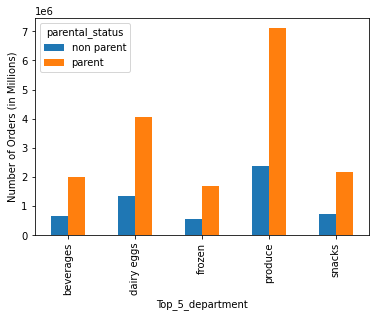

In [298]:
top5_parent = crosstab_top5_parent.plot.bar(ylabel = 'Number of Orders (in Millions)')

In [299]:
top5_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_parent.png'))

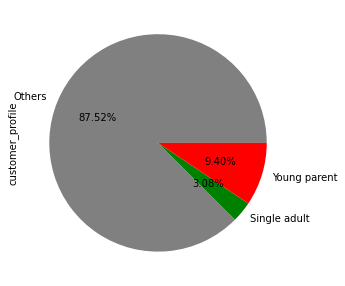

In [305]:
#Customer profile: age older than 25, makes less than $400,000 a year, within top 5 departments 

customer_pro = ords_prods_merge['customer_profile'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['grey','green', 'red'])

In [304]:
customer_pro.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile.png'))

In [321]:
#create crosstab of busiest day and day of week

crosstab_busy = pd.crosstab(ords_prods_merge['busiest_day'], ords_prods_merge['day_of_week'], dropna = False)

In [318]:
crosstab_busy

day_of_week,Friday,Monday,Saturday,Sunday,Tuesday,Wednesday
busiest_day,,,,,,
Busiest day,0,0,6204182,0,0,0
Least busy,0,0,0,0,0,3783802
Regularly busy,4496490,4213830,0,5660230,3840534,0


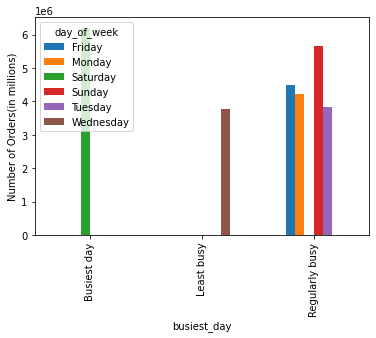

In [319]:
busy_day = crosstab_busy.plot.bar(ylabel = 'Number of Orders(in millions)')

In [320]:
busy_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busy_day.png'))

In [325]:
crosstab_hours = pd.crosstab(ords_prods_merge['Busiest_period_of_day'], ords_prods_merge['order_hour_of_day'], dropna = False)

In [326]:
crosstab_hours

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Busiest_period_of_day,,,,,,,,,,,,,,,,,,,,,
Average orders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fewest orders,218769,115700,69375,51281,53242,87961,290493,891054,1718118,2454203,...,2689136,2662144,2535202,2087654,1636502,1258305,976156,795637,634225,402316
Most orders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Busiest_period_of_day'>

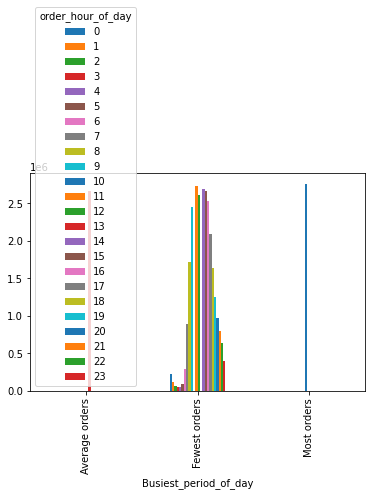

In [327]:
crosstab_hours.plot.bar()

## We can make a few connections by looking at these profiles. Young parents account for more of our sales that single adults. Produce is the most popular department and young parents account for more than double the sales single adults do in the produce department.

# Exports

In [332]:
# Export ords_prods_cust_merged as pickle file

ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))